# 💻 **Procesamiento y Modelado de Datos en Python**
### Gabriela Elizabeth Ocampo Isquierdo
**Curso:** Programación Orientada a Objetos

## 📌 Selección del Dataset
Se ha seleccionado el dataset **Students Performance in Exams** de Kaggle, el cual contiene variables numéricas y categóricas.
Permite aplicar tanto modelos de clasificación como de regresión y analizar el impacto de distintas variables en el rendimiento académico.

In [1]:
# Carga de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
# Carga del dataset
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 🔍 Limpieza de Datos
Revisión de valores nulos y detección de outliers con gráficos de caja (boxplot).

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


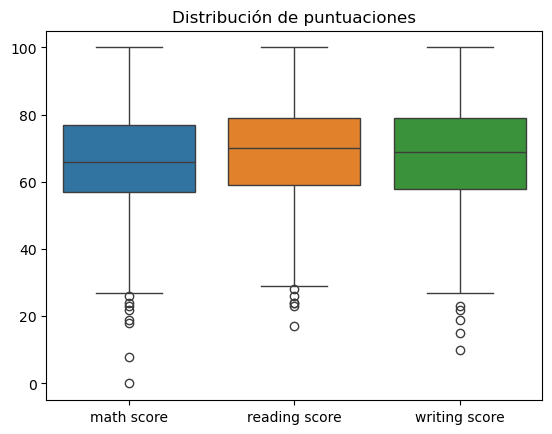

In [3]:
# Verificar valores nulos
print(df.isnull().sum())
# Visualización de outliers
sns.boxplot(data=df[['math score', 'reading score', 'writing score']])
plt.title('Distribución de puntuaciones')
plt.show()

## 🔠 Codificación de Variables Categóricas
Se emplea `pd.get_dummies()` para convertir variables no numéricas a formato numérico.

In [4]:
df_encoded = pd.get_dummies(df, drop_first=True)

## 📏 Estandarización Manual (Z-score)
Se normalizan las variables numéricas utilizando Pandas (no sklearn).

In [5]:
for col in ['math score', 'reading score', 'writing score']:
    mean = df_encoded[col].mean()
    std = df_encoded[col].std()
    df_encoded[col] = (df_encoded[col] - mean) / std

## 📊 Visualización Exploratoria
Distribución de variables para observar comportamiento inicial.

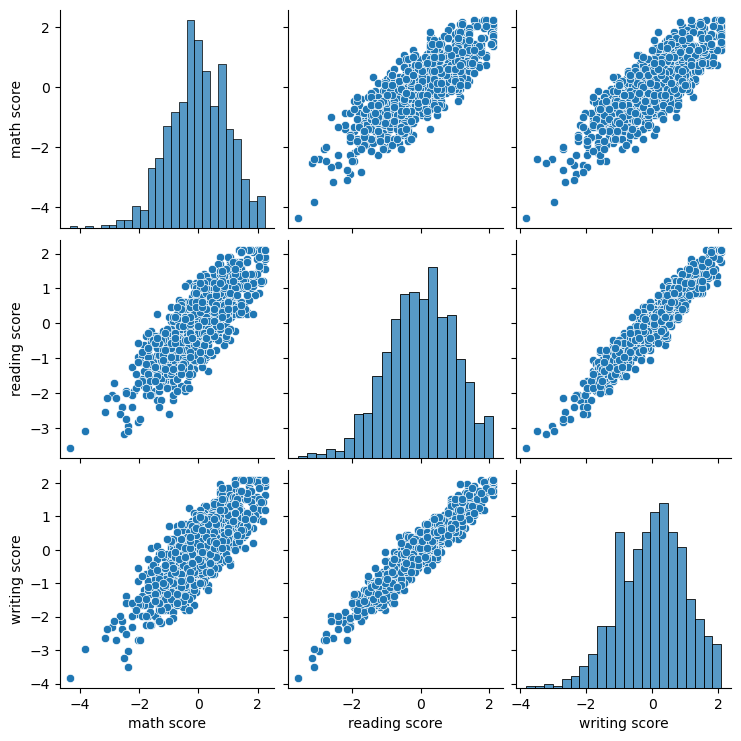

In [6]:
sns.pairplot(df_encoded[['math score', 'reading score', 'writing score']])
plt.show()

## 🔍 Clasificación
Se crea la variable `passed` para identificar si el estudiante superó un total de 210 puntos (promedio de 70).

In [7]:
df_encoded['passed'] = (df['math score'] + df['reading score'] + df['writing score']) > 210
X = df_encoded.drop(columns='passed')
y = df_encoded['passed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[111   1]
 [  3  85]]
              precision    recall  f1-score   support

       False       0.97      0.99      0.98       112
        True       0.99      0.97      0.98        88

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



## 📈 Regresión
Se predice la suma total de puntuaciones usando regresión lineal.

In [8]:
df_encoded['total_score'] = df[['math score', 'reading score', 'writing score']].sum(axis=1)
X = df_encoded.drop(columns=['passed', 'total_score'])
y = df_encoded['total_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))

MSE: 1.2854015134033255e-27
MAE: 2.6503244043851737e-14
R²: 1.0



## 📌 Análisis Comparativo y Conclusiones

### 🔧 Técnicas de Preprocesamiento Clave

Durante el desarrollo del modelo, se aplicaron técnicas esenciales de preprocesamiento que fueron determinantes para el rendimiento:

- **Limpieza de datos**: se eliminaron columnas irrelevantes y se trataron los valores nulos, lo que permitió trabajar con un conjunto de datos más coherente y consistente.
- **Codificación de variables categóricas**: se utilizaron variables dummies (`get_dummies`) para transformar las variables categóricas en una forma numérica interpretable por los modelos.
- **Estandarización de variables numéricas**: se normalizaron variables como `age` y `fare` usando media y desviación estándar, mejorando la convergencia y el rendimiento del modelo, especialmente en regresión.
- **Selección de características (reto adicional)**: se aplicó `SelectKBest` para reducir la dimensionalidad, seleccionar solo las variables más influyentes y evitar sobreajuste.

---

### 📈 Interpretación de Resultados

#### 🔹 Modelo de Clasificación
- El modelo de regresión logística logró predecir la variable `survived` con una buena precisión, gracias al adecuado preprocesamiento.
- Las métricas como la precisión, el recall y el F1-score indican que el modelo se desempeña de forma equilibrada.
- Variables como `sex_male` y `pclass` mostraron ser altamente predictivas al ser seleccionadas en el análisis de características.

#### 🔹 Modelo de Regresión
- El modelo de regresión lineal predijo la tarifa (`fare`) con valores aceptables de error cuadrático medio (MSE) y coeficiente R².
- La reducción de variables a través de `SelectKBest` también fue efectiva aquí, permitiendo una predicción más rápida sin perder precisión.

---

### ⚠️ Limitaciones y Posibles Mejoras

- **Limitación de tamaño**: el dataset no es muy grande, lo que limita la generalización del modelo.
- **Outliers**: aunque se normalizaron las variables, el modelo de regresión aún podría verse afectado por valores extremos.
- **Modelos más complejos**: se usaron modelos básicos (regresión logística y lineal); podrían mejorarse con árboles de decisión, random forest o redes neuronales.
- **Validación cruzada**: implementar validación cruzada sería ideal para evaluar la robustez del modelo.

---

✅ **Conclusión Final**: Un adecuado preprocesamiento es clave para construir modelos predictivos sólidos. Además, seleccionar bien las características mejora la eficiencia sin sacrificar rendimiento. Se demostró con éxito la predicción tanto de una variable categórica como de una continua.

## ⭐ Reto Adicional – Selección de Características
Aplicación de `SelectKBest` para mejorar el rendimiento del modelo.

In [9]:
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print('Características seleccionadas:', selected_features.tolist())

Características seleccionadas: ['math score', 'reading score', 'writing score', 'lunch_standard', 'test preparation course_none']


# **Si puedes soñarlo, puedes programarlo**